## Importing data

In [2]:
import kagglehub 


/home/arbiter/projects/stellar-classification/.env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("fedesoriano/stellar-classification-dataset-sdss17")

print("Path to dataset files:", path)

Path to dataset files: /home/arbiter/.cache/kagglehub/datasets/fedesoriano/stellar-classification-dataset-sdss17/versions/1


In [4]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [5]:
data_path = "~/.cache/kagglehub/datasets/fedesoriano/stellar-classification-dataset-sdss17/versions/1/star_classification.csv"

df = pd.read_csv(data_path)

In [6]:
df.head(2)

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427

## EDA and data cleaning

In [7]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [8]:
df.info()   #checking the datatypes of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
df.describe()   # checking the 

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [10]:
print(f"Rows : {df.shape[0]} \nColumns : {df.shape[1]}")

Rows : 100000 
Columns : 18


### Inspecting the data


In [11]:
df["rerun_ID"].unique()

array([301])

In [12]:
df["cam_col"].unique()  # categorical feature

array([2, 5, 3, 4, 6, 1])

### Handling missing values if any

<Axes: >

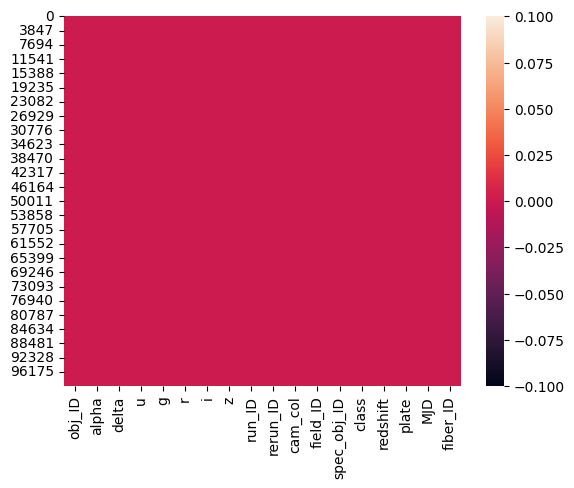

In [13]:
sns.heatmap(df.isnull())

No missing data

### Exploring data characteristics and visualizing relationships

In [14]:
correlation_matrix = df.drop("class", axis = 1).corr()

<Axes: >

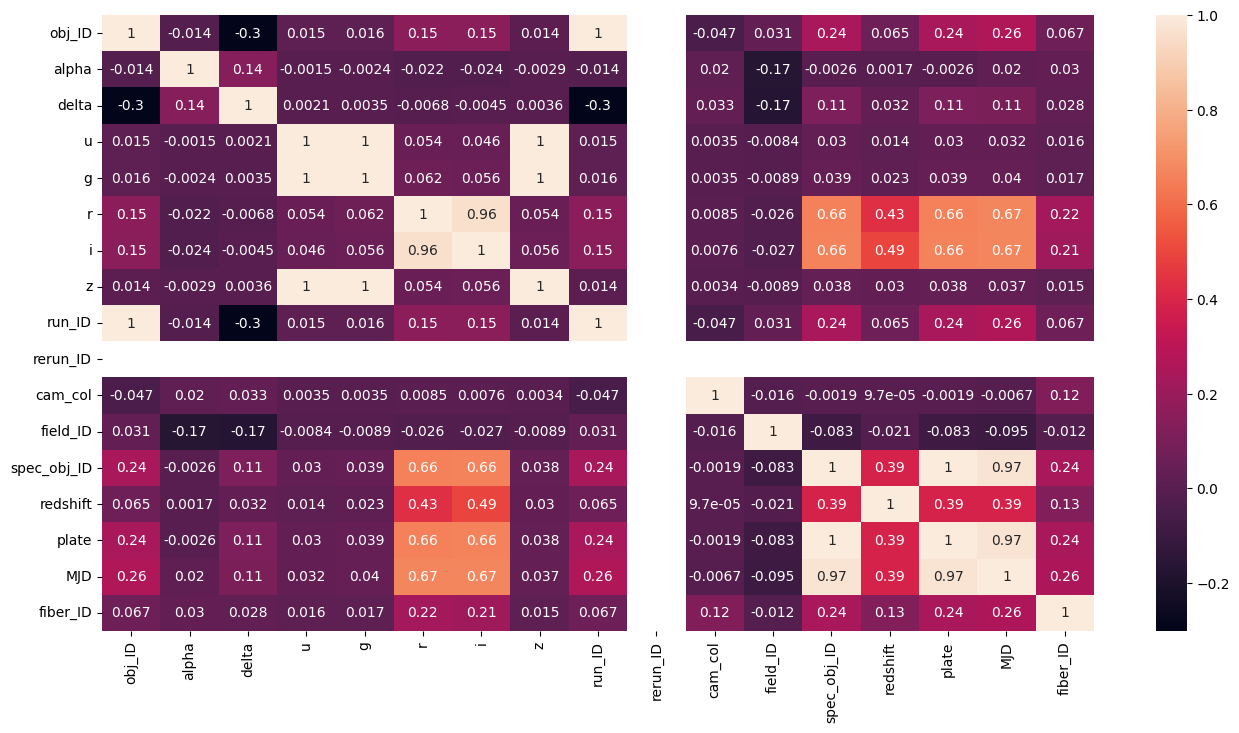

In [15]:
# Exploring correlation between the features
plt.figure(figsize= (16,8))
sns.heatmap(correlation_matrix, annot= True)

In [16]:
df.drop("rerun_ID", axis = 1, inplace = True)

In [17]:
df.head(1)

obj_ID       alpha      delta         u        g         r         i  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.2753  20.39501  19.16573   

          z  run_ID  cam_col  field_ID   spec_obj_ID   class  redshift  plate  \
0  18.79371    3606        2        79  6.543777e+18  GALAXY  0.634794   5812   

     MJD  fiber_ID  
0  56354       171

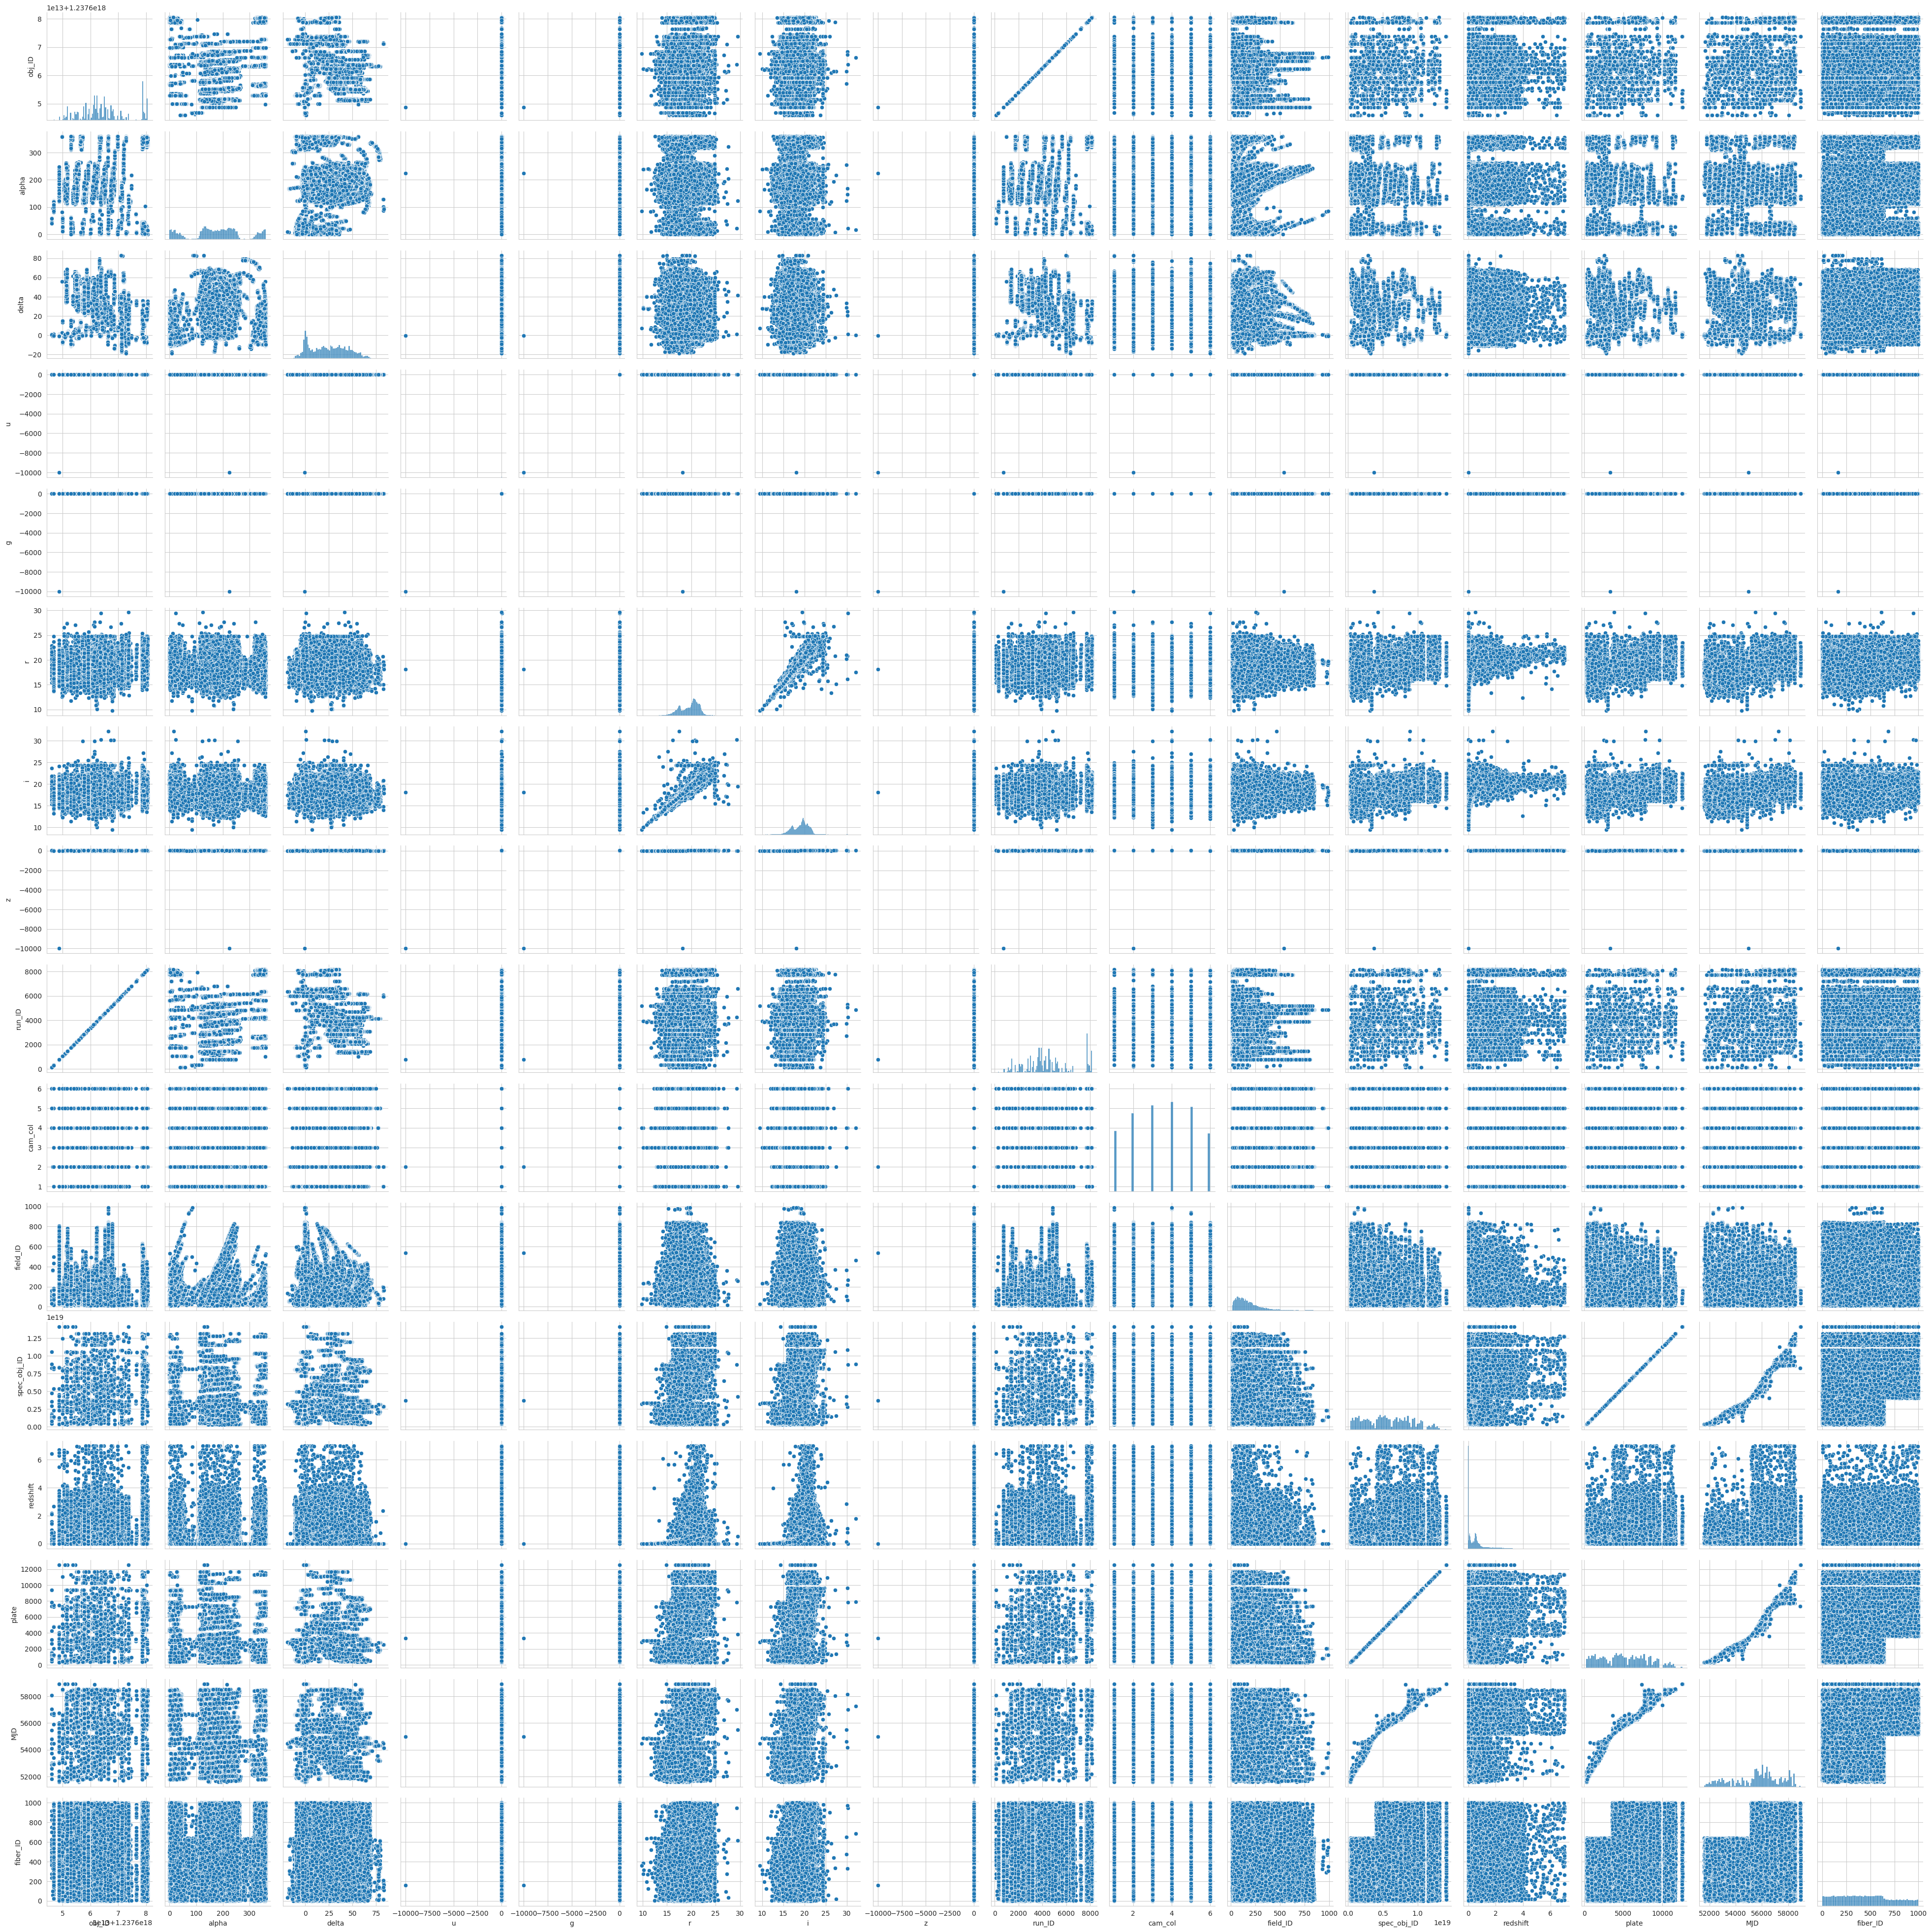

In [18]:
sns.set_style("whitegrid")
sns.pairplot(df)

In [19]:
df.head(1)

obj_ID       alpha      delta         u        g         r         i  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.2753  20.39501  19.16573   

          z  run_ID  cam_col  field_ID   spec_obj_ID   class  redshift  plate  \
0  18.79371    3606        2        79  6.543777e+18  GALAXY  0.634794   5812   

     MJD  fiber_ID  
0  56354       171

In [25]:
df["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

/tmp/ipykernel_1042/2116405569.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["u"], label = "Galaxy")
/tmp/ipykernel_1042/2116405569.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["u"], label = "Quasar")
/tmp/ipykernel_1042/211640556

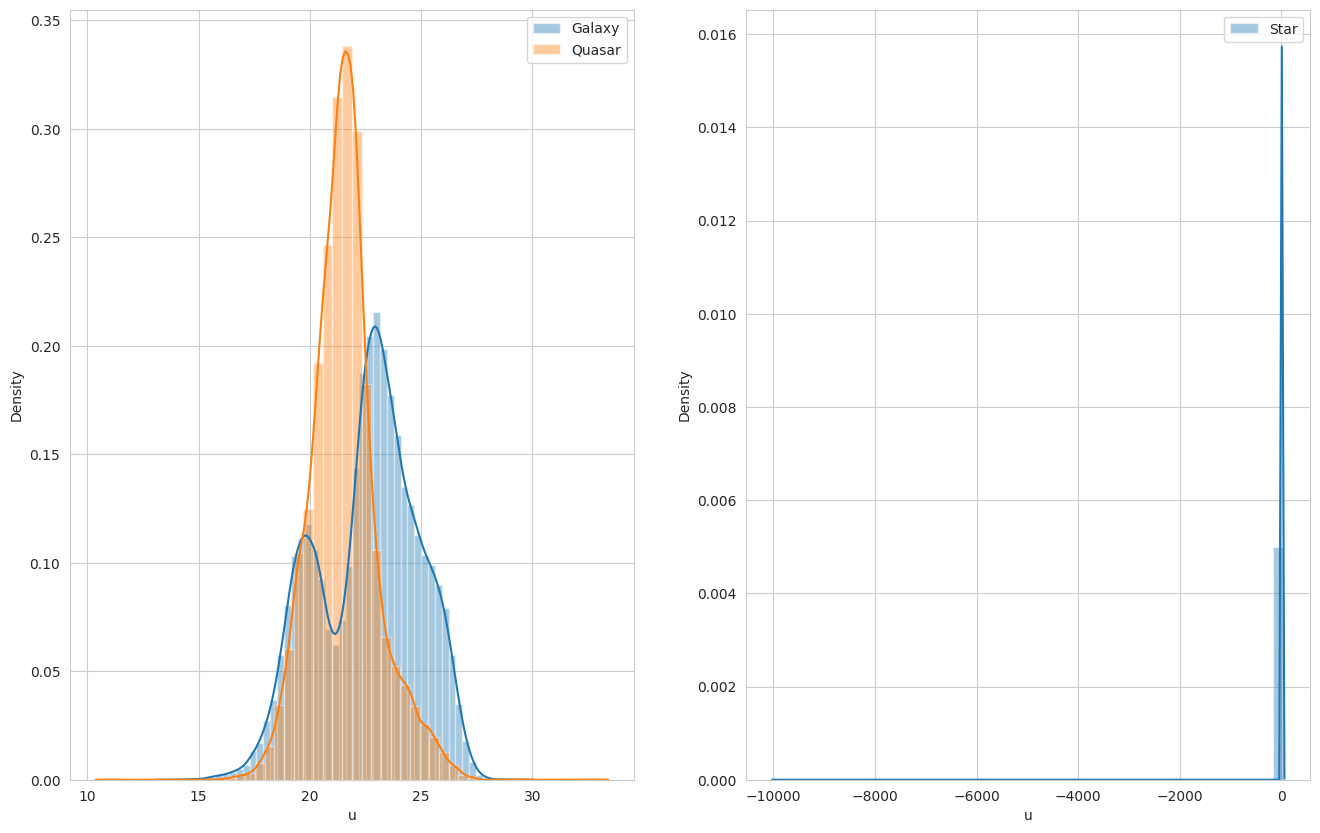

In [39]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["u"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["u"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["u"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/3588833202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["g"], label = "Galaxy")
/tmp/ipykernel_1042/3588833202.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["g"], label = "Quasar")
/tmp/ipykernel_1042/358883320

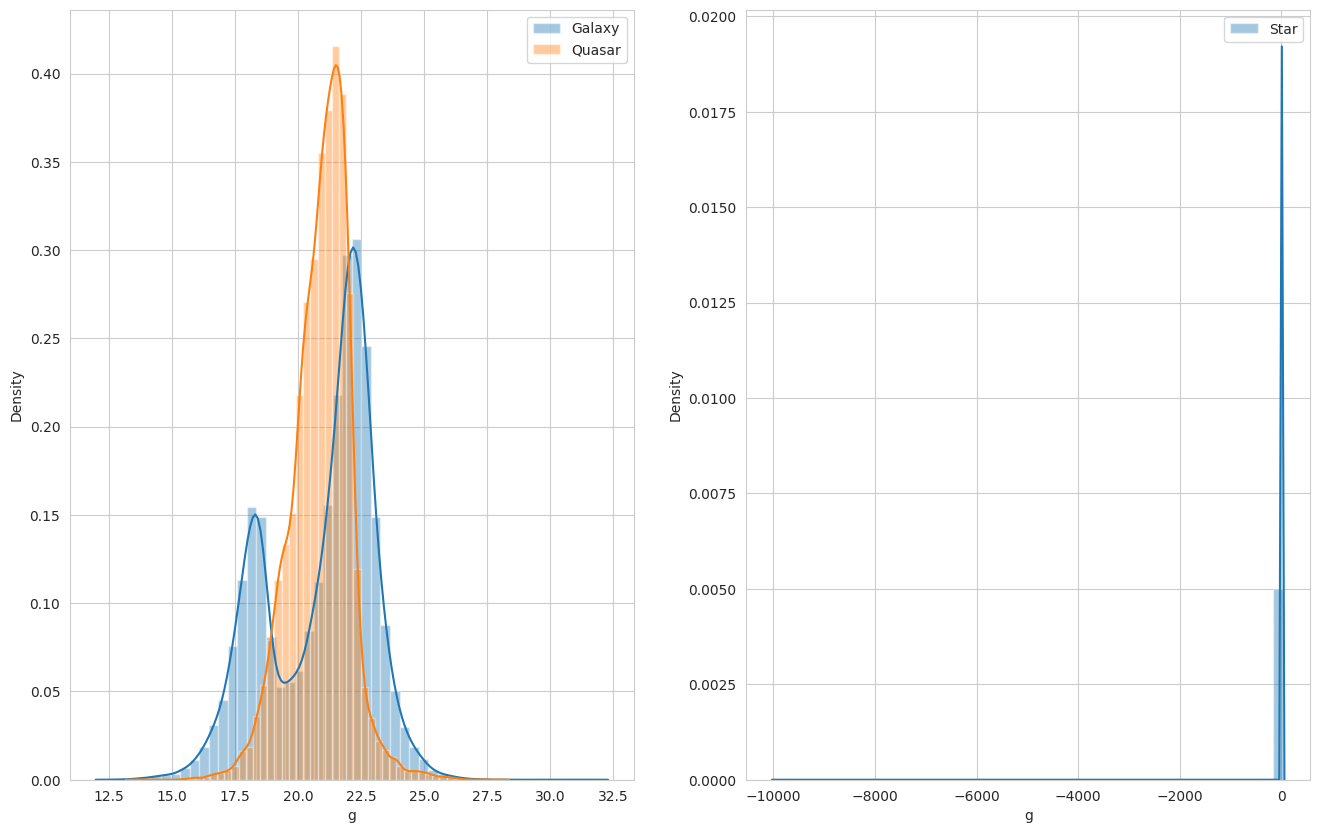

In [40]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["g"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["g"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["g"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/3861663863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["r"], label = "Galaxy")
/tmp/ipykernel_1042/3861663863.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["r"], label = "Quasar")
/tmp/ipykernel_1042/386166386

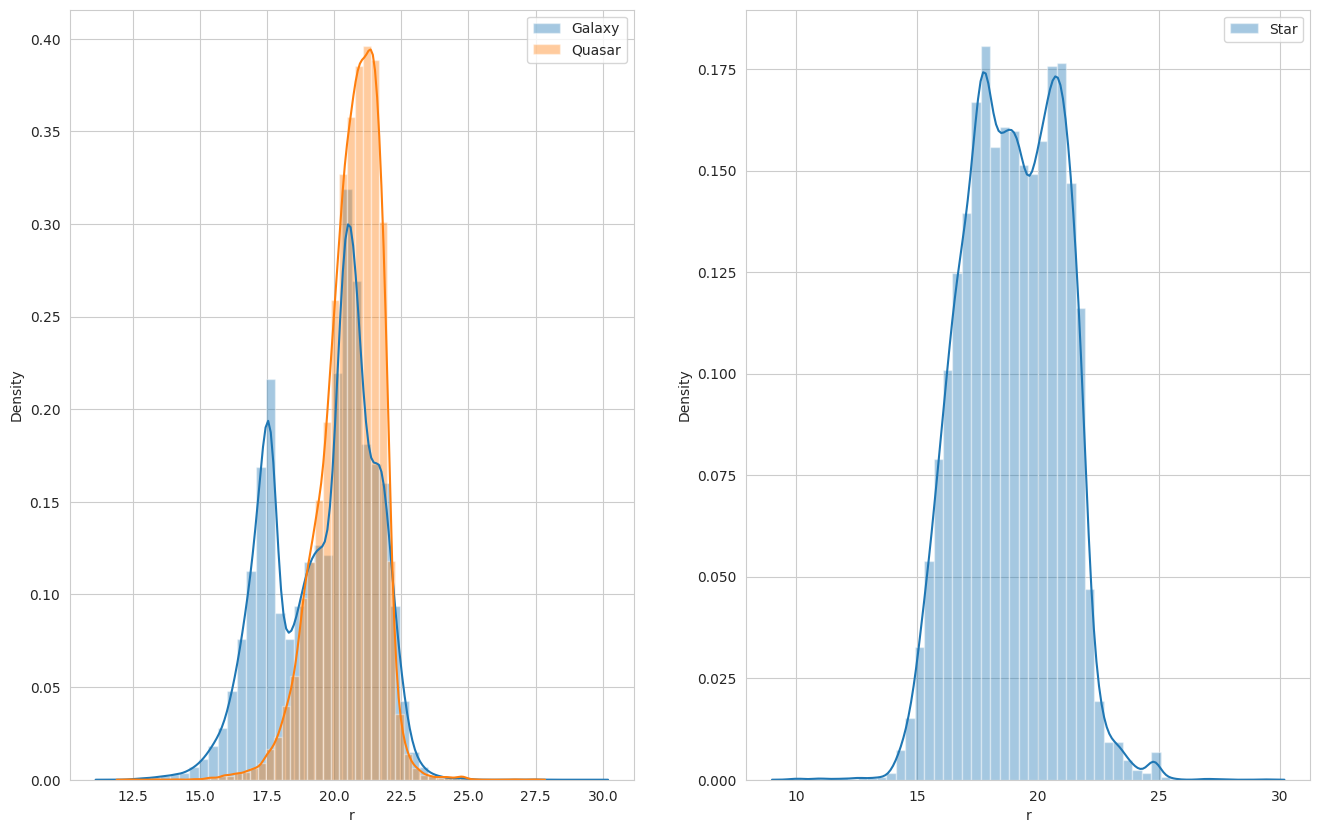

In [41]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["r"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["r"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["r"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/2935675350.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["i"], label = "Galaxy")
/tmp/ipykernel_1042/2935675350.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["i"], label = "Quasar")
/tmp/ipykernel_1042/293567535

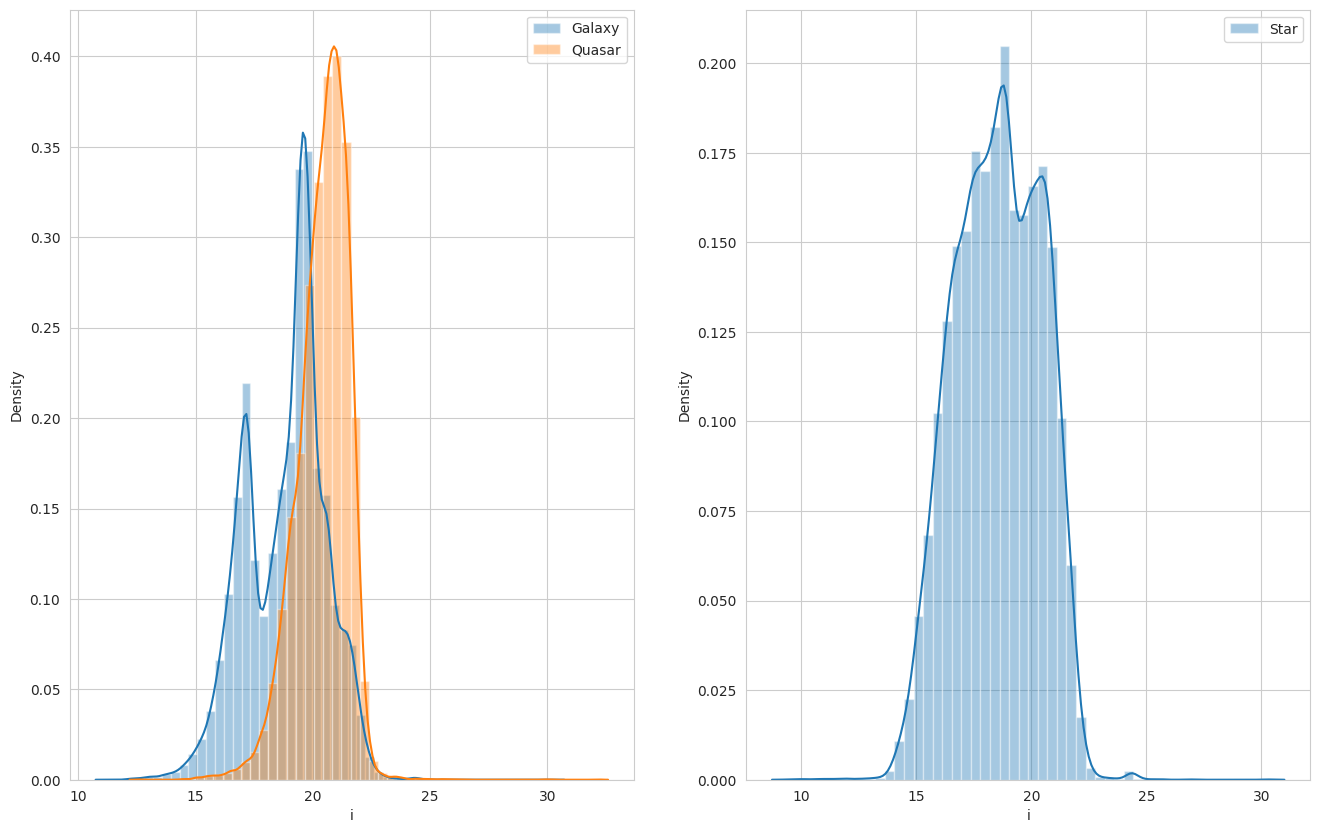

In [42]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["i"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["i"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["i"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/1330974750.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["z"], label = "Galaxy")
/tmp/ipykernel_1042/1330974750.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["z"], label = "Quasar")
/tmp/ipykernel_1042/133097475

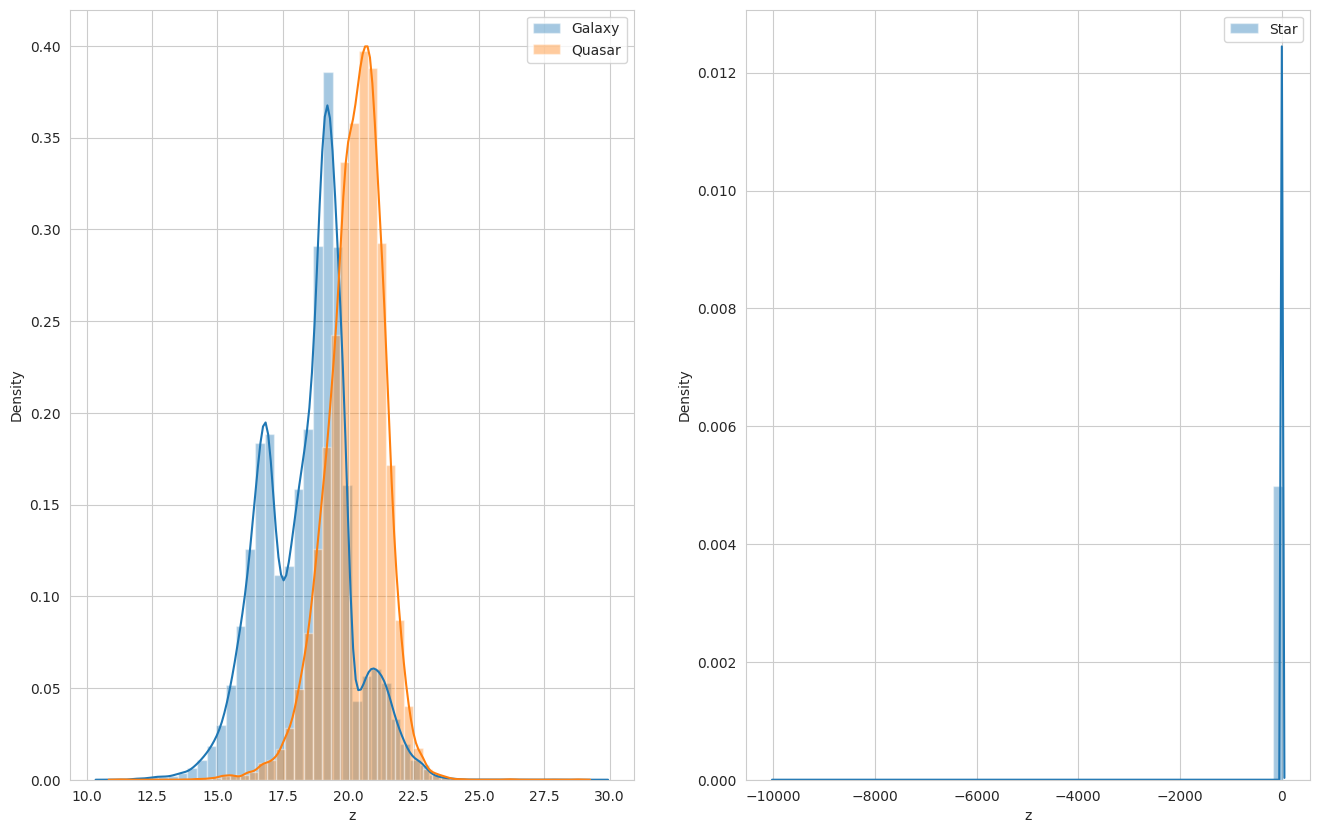

In [51]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["z"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["z"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["z"], label = "Star")

plt.legend()

<Axes: xlabel='class', ylabel='count'>

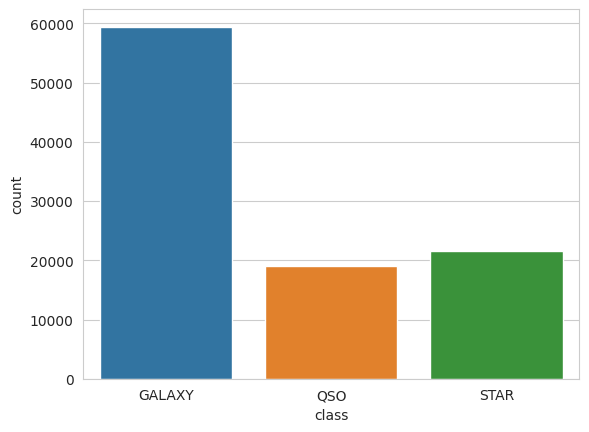

In [45]:
sns.countplot(x= df["class"], hue= df["class"])

<Axes: ylabel='class'>

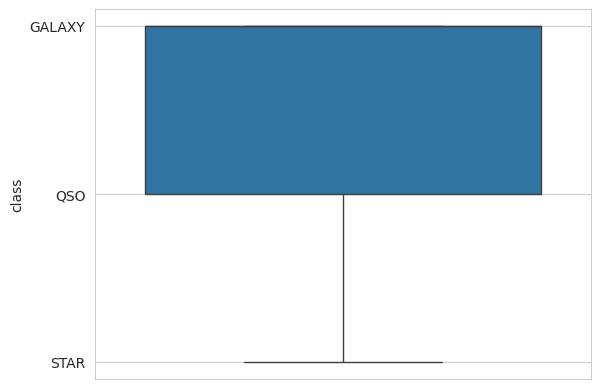

In [50]:
sns.boxplot(df["class"])

In [53]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Changing the values of class feature to integers

In [65]:
df["class"] = df["class"].replace({"GALAXY": 0, "STAR": 1, "QSO": 2})


/tmp/ipykernel_1042/1677114075.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({"GALAXY": 0, "STAR": 1, "QSO": 2})


In [66]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  cam_col  field_ID   spec_obj_ID  class  \
0  19.16573  18.79371    3606        2        79  6.543777e+18      0   
1  21.16812  21.61427    4518        5       119  1.176014e+19      0   
2  19.34857  18.94827    3606        2       120  5.152200e+18      0   
3  20.50454  19.25010    4192        3       214  1.030107e+19      0   
4  15.97711  15.54461    8102        3       137  6.891865e+18      0   

   redshift  plate    MJD  fiber_ID  
0  0.634794   5812  56354       171  
1  0.779136  10445  58158       427  
2  0.644195   4576  55592       299  
3  0.932346   9149  58039       775  
4  0.116123   6121  56187       842

In [68]:
type(df["class"][0])

numpy.int64

Checking the correlation of all the features with the target label

<Axes: >

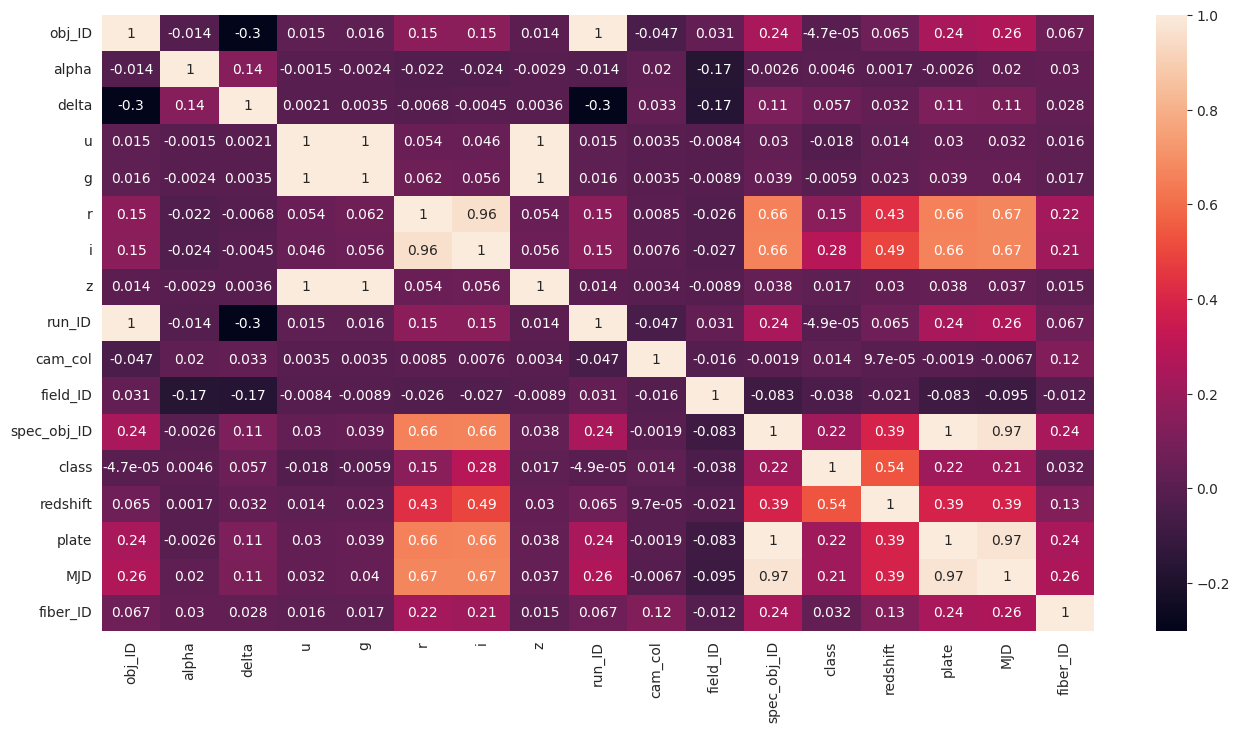

In [71]:
corr = df.corr()

plt.figure(figsize = (16,8))
sns.heatmap(corr, annot= True)

In [73]:
corr["class"].sort_values()

field_ID      -0.038044
u             -0.017701
g             -0.005915
run_ID        -0.000049
obj_ID        -0.000047
alpha          0.004552
cam_col        0.014476
z              0.017352
fiber_ID       0.032053
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
class          1.000000
Name: class, dtype: float64

Dropping the least relevant features

In [75]:
df.drop(["obj_ID", "alpha", "delta", "cam_col", "run_ID", "field_ID", "fiber_ID"], axis = 1, inplace = True)

In [76]:
df.head(2)

u         g         r         i         z   spec_obj_ID  class  \
0  23.87882  22.27530  20.39501  19.16573  18.79371  6.543777e+18      0   
1  24.77759  22.83188  22.58444  21.16812  21.61427  1.176014e+19      0   

   redshift  plate    MJD  
0  0.634794   5812  56354  
1  0.779136  10445  58158

Splitting and standardising the feature space : 

In [78]:
X  = df.drop("class", axis = 1)
y = df["class"]

In [83]:
X.columns

Index(['u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'redshift', 'plate', 'MJD'], dtype='object')

In [ ]:
def stand(dataframe):
    ''' Standardize the given dataframe \n
        (Parameters \n 
        dataframe : None
        ) -> dataframe'''

    for i in dataframe.columns:
        dataframe[i] = (dataframe[i] - np.mean(dataframe[i]))/np.std(dataframe[i])

    return dataframe


In [88]:
X = stand(X)
X.head()


u         g         r         i         z  spec_obj_ID  redshift  \
0  0.059755  0.054926  0.403962  0.046007  0.003937     0.228609  0.079557   
1  0.088045  0.072456  1.584406  1.185097  0.092835     1.797912  0.277096   
2  0.103327  0.067165  0.519745  0.150019  0.008808    -0.190037  0.092423   
3  0.004921  0.102210  1.059904  0.807610  0.018321     1.358962  0.486770   
4 -0.080055 -0.092948 -1.697421 -1.767887 -0.098468     0.333328 -0.630267   

      plate       MJD  
0  0.228633  0.423203  
1  1.797924  1.420729  
2 -0.190025  0.001854  
3  1.358942  1.354927  
4  0.333297  0.330860

In [89]:
X.describe()

u             g             r             i             z  \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean  -1.154632e-18 -7.105427e-20  8.881784e-18 -1.399769e-17 -1.421085e-19   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -3.154314e+02 -3.155745e+02 -5.296504e+00 -5.469610e+00 -3.157360e+02   
25%   -5.124836e-02 -4.932757e-02 -8.140905e-01 -7.694294e-01 -3.807782e-02   
50%    6.253452e-03  1.790380e-02  2.585404e-01  1.822022e-01  1.058323e-02   
75%    5.373051e-02  5.015351e-02  7.542917e-01  7.461467e-01  3.947018e-02   
max    3.399816e-01  3.486868e-01  5.351716e+00  7.427453e+00  3.377122e-01   

        spec_obj_ID      redshift         plate           MJD  
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  
mean   1.421085e-18 -1.236344e-17  1.488587e-17  8.668621e-18  
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  
min   -1.649929e+00 -8.028309e-01 -1.649910e+00 -2.201107e+00  
25%   -8.843999e-01 -7.145769e-01 -8.844019e-01 -7.490551e-01  
50%   -5.084211e-02 -2.086859e-01 -5.081131e-02  1.547450e-01  
75%    7.666252e-01  1.744805e-01  7.666054e-01  6.571019e-01  
max    2.509946e+00  8.806011e+00  2.509914e+00  1.848714e+00